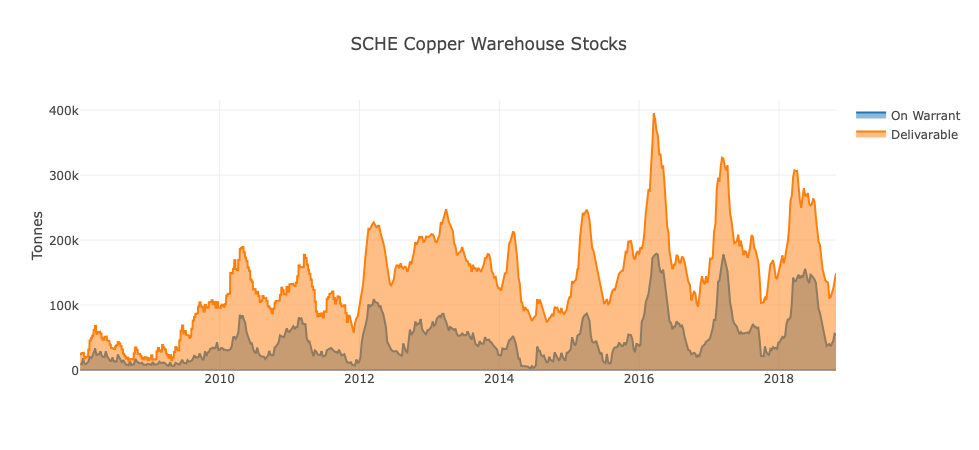

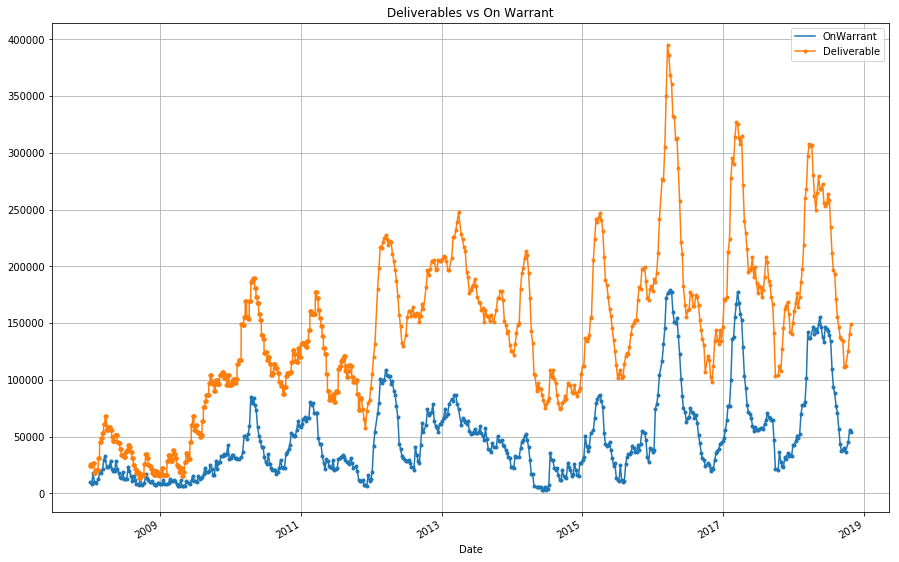

In [6]:
df1 = pd.read_csv('data/SCF-TOTAL-W.csv', index_col=0, parse_dates=True, dayfirst=True).sort_index()
df2 = pd.read_csv('data/CU-STX-SGH.csv', index_col=0, parse_dates=True, dayfirst=True).sort_index()

data = [go.Scatter(x=df1.index, y=df1.OnWarrant, mode = 'lines', name='On Warrant', fill='tozeroy'),
        go.Scatter(x=df2.index, y=df2.Deliverable, mode = 'lines', fill='tozeroy', name='Delivarable'),
       ]
layout = go.Layout(
    title='SCHE Copper Warehouse Stocks',
    yaxis=dict(
        title='Tonnes'
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

ax1 = df1.plot(grid=True, figsize=(15,10), marker='.', legend=True, title='Deliverables vs On Warrant')
_ = df2.plot(grid=True, figsize=(15,10), marker='.', legend=True, ax=ax1)

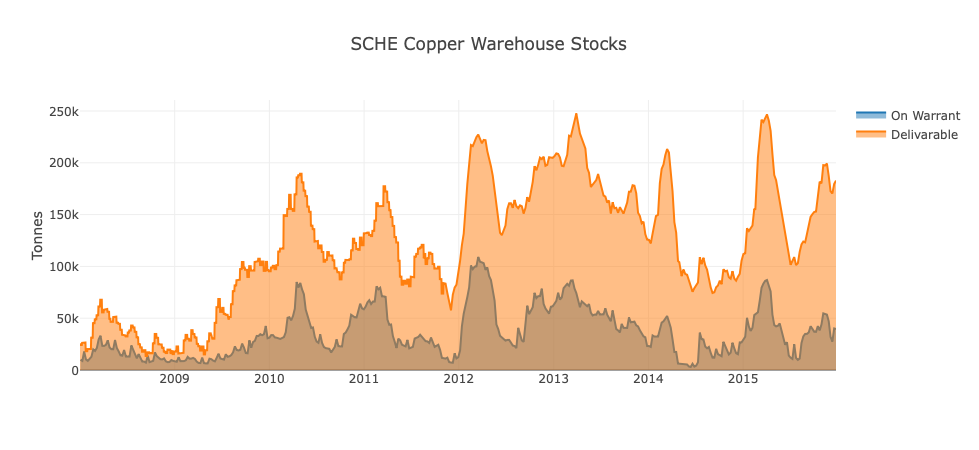

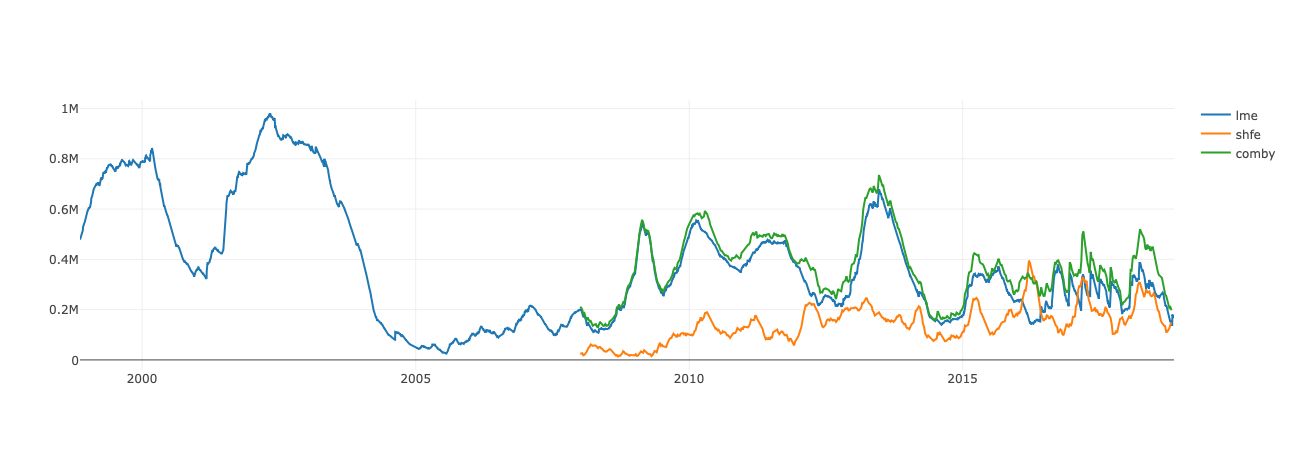

In [30]:
lme = pd.read_pickle('data/LME-stocks')
shfe = pd.read_pickle('data/SCF-warehouse-weekly')
px = pd.read_pickle('data/SCFc-fc-px')
comb = lme.volume + shfe.OnWarrant
comb = comb.dropna()

iplot(go.Figure([go.Scatter(x=lme.index, y=lme.volume, name='lme'),
                go.Scatter(x=shfe.index, y=shfe.Deliverable, name='shfe'),
                go.Scatter(x=comb.index, y=comb, name='comby'),
#                go.Scatter(x=px.index, y=px.SCFc01, yaxis='y2'),
                ],
               layout=go.Layout(yaxis2=dict(title='Spread', overlaying='y', side='right'))))